<img src="rock-paper-scissors-lizard-spock.gif" width=400>

### Project Description

Goal is to build a network which is able to play Rock-Paper-Scissors-Lizard-Spock from the famous TV show, The Big Bang Theory. The input of the network is a low-resolution picture of any of the possible 5 hands and output is also an image which counters the input hand. 

### Rules

<img src="game_rules.PNG" width=10000>

### Creating the Dataset

In [5]:
import cv2 
import os
import numpy as np

In [134]:
# define a video capture object 
vid = cv2.VideoCapture(0) 

cv2.namedWindow("rock-paper-scissors-lizard-spock")

img_x = 64
img_y = 64

img_per_gesture = 200

# list of gestures to iter through
gestures = ["rock", "paper", "scissors", "lizard", "spock"]

# create directory for each gesture
def create_folder(folder_name):
    if not os.path.exists(folder_name):
        os.mkdir(folder_name)

# for foreground extraction
background_model = np.zeros((1,65),np.float64)
foreground_model = np.zeros((1,65),np.float64)
rect = (155,0,310,410)


for gesture in gestures:
    img_counter = 0
    
    create_folder(gesture)
    
    while(True): 

        # capture the video frame by frame 
        ret, frame = vid.read() 

        # error messgae if opencv failed to capture frame
        if not ret:
            print("failed to grab frame")
            break
        
        # display frame captured
        cv2.putText(frame, "Capturing frame {} of {}".format(img_counter, gesture), (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (120, 255, 255))
        
        # display the resulting frame 
        cv2.imshow("rock-paper-scissors-lizard-spock", frame)
        
        # process image 
        # interactive foreground extraction
        mask = np.zeros(frame.shape[:2],np.uint8)
        cv2.grabCut(frame,mask,rect,background_model,foreground_model,5,cv2.GC_INIT_WITH_RECT)
        mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
        frame = frame*mask2[:,:,np.newaxis]
        
        # convert to grayscale
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # save image
        img_name = "{}/{}_{}.png".format(gesture, gesture, img_counter)
        frame = cv2.resize(frame, (img_x, img_y))
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1
        
        # exit with ESC
        k = cv2.waitKey(1)
        
        if k%256 == 27:
            # ESC pressed
            print("Escape hit, closing...")
            break
        
        # jump to next gesture
        if img_counter == img_per_gesture:
            break

# after the loop release the cap object 
vid.release()

# destroy all the windows 
cv2.destroyAllWindows() 

rock/rock_100.png written!
rock/rock_101.png written!
rock/rock_102.png written!
rock/rock_103.png written!
rock/rock_104.png written!
rock/rock_105.png written!
rock/rock_106.png written!
rock/rock_107.png written!
rock/rock_108.png written!
rock/rock_109.png written!
rock/rock_110.png written!
rock/rock_111.png written!
rock/rock_112.png written!
rock/rock_113.png written!
rock/rock_114.png written!
rock/rock_115.png written!
rock/rock_116.png written!
rock/rock_117.png written!
rock/rock_118.png written!
rock/rock_119.png written!
rock/rock_120.png written!
rock/rock_121.png written!
rock/rock_122.png written!
rock/rock_123.png written!
rock/rock_124.png written!
rock/rock_125.png written!
rock/rock_126.png written!
rock/rock_127.png written!
rock/rock_128.png written!
rock/rock_129.png written!
rock/rock_130.png written!
rock/rock_131.png written!
rock/rock_132.png written!
rock/rock_133.png written!
rock/rock_134.png written!
rock/rock_135.png written!
rock/rock_136.png written!
r

scissors/scissors_175.png written!
scissors/scissors_176.png written!
scissors/scissors_177.png written!
scissors/scissors_178.png written!
scissors/scissors_179.png written!
scissors/scissors_180.png written!
scissors/scissors_181.png written!
scissors/scissors_182.png written!
scissors/scissors_183.png written!
scissors/scissors_184.png written!
scissors/scissors_185.png written!
scissors/scissors_186.png written!
scissors/scissors_187.png written!
scissors/scissors_188.png written!
scissors/scissors_189.png written!
scissors/scissors_190.png written!
scissors/scissors_191.png written!
scissors/scissors_192.png written!
scissors/scissors_193.png written!
scissors/scissors_194.png written!
scissors/scissors_195.png written!
scissors/scissors_196.png written!
scissors/scissors_197.png written!
scissors/scissors_198.png written!
scissors/scissors_199.png written!
lizard/lizard_100.png written!
lizard/lizard_101.png written!
lizard/lizard_102.png written!
lizard/lizard_103.png written!
l

### Read Dataset

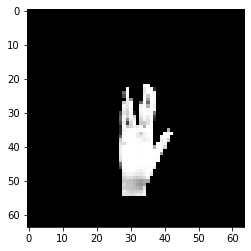

In [137]:
import matplotlib.pyplot as plt
import glob

images = []

for gesture in gestures:
    img_dir = "{}/*.png".format(gesture)

    tmp = [cv2.imread(file) for file in glob.glob(img_dir)]
    images = images + tmp
    
# display image as an example
plt.imshow(images[802], cmap = "gray")

In [138]:
# generate one-hot encoded labels

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

text_labels = []

for gesture in gestures:
    tmp = [gesture] * img_per_gesture
    text_labels = text_labels + tmp

text_labels = np.array(text_labels)

# integer encode (changes order to alphabetical)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(text_labels)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
labels = onehot_encoded
print(onehot_encoded)

# invert first binary encoded item for checking
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
print(inverted)

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
['rock']


### Spliting the dataset into train, validation and test

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 123)

In [141]:
x_train = np.array(x_train)
x_test = np.array(x_test)

### Rescale Images

In [142]:
# Normalize the images
x_train = x_train / 255
x_test = x_test / 255

In [143]:
x_train.shape, x_test.shape

((800, 64, 64, 3), (200, 64, 64, 3))

### Building Neural Network

In [144]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [145]:
def create_model(img_x, img_y):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(img_x, img_y, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    Dropout(0.3),
    model.add(Dense(5, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    model.save("model.h5")
    
    return model

In [146]:
model = create_model(x_train.shape[1], x_train.shape[2])

In [147]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               2880100   
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 505       
Total params: 2,883,037
Trainable params: 2,883,037
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [148]:
# set seed for reproducibility
from numpy.random import seed

seed(123)

In [149]:
cnn = model.fit(x_train, 
                y_train,  
                epochs=100, 
                batch_size=20,
                validation_split=0.2,
                callbacks=[EarlyStopping(patience=3)])

Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 2s 3ms/step - loss: 0.7482 - accuracy: 0.7328 - val_loss: 0.5486 - val_accuracy: 0.7937
Epoch 2/100
640/640 [==============================] - 2s 3ms/step - loss: 0.1743 - accuracy: 0.9406 - val_loss: 0.3189 - val_accuracy: 0.9000
Epoch 3/100
640/640 [==============================] - 2s 3ms/step - loss: 0.0771 - accuracy: 0.9781 - val_loss: 0.2048 - val_accuracy: 0.9312
Epoch 4/100
640/640 [==============================] - 2s 3ms/step - loss: 0.0165 - accuracy: 0.9984 - val_loss: 0.2291 - val_accuracy: 0.9375
Epoch 5/100
640/640 [==============================] - 2s 3ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.2392 - val_accuracy: 0.9312
Epoch 6/100
640/640 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.2139 - val_accuracy: 0.9250


The algorithm stopped after epoch 6 due to early stopping. The figure below shows the training and validation accuracy over time. We can see how the validation accuracy is plateauing while the training accuracy continues to improve as we star to overfit.

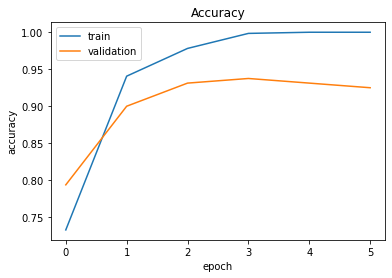

In [150]:
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'])

plt.show()

### Evaluating the model

In [151]:
score = model.evaluate(
  x_test,
  y_test
)

print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

200/200 [==============================] - 0s 660us/step
accuracy: 96.00%


### Confusion matrix

In [152]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [153]:
seed(123)

y_pred = model.predict_classes(x_test)
y_test_original=np.argmax(y_test,axis=1) # before one-hot encoding

In [154]:
print("Classification report \n=======================")
print(classification_report(y_true=y_test_original, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       1.00      0.93      0.97        45
           2       0.98      1.00      0.99        42
           3       0.89      0.92      0.91        26
           4       0.92      0.96      0.94        46

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



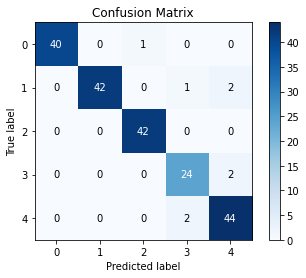

In [155]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test_original, y_pred, normalize=False)
plt.show()